# Лабораторная работа №7. "Полносвязные нейронные сети (многослойный персептрон). Решение задач регрессии и классификации"

**Задание №1.**

- Решить задачи регрессии и классификации на данных в соответствии с Вашим индивидуальным вариантом (см. Лаб.работы №3, 4), используя полносвязные НС;
- Реализовать НС посредством API Keras и фреймворка TensorFlow; оценить качество полученных моделей с помощью метрик.

**Задание №2.**

Разработать многослойный персептрон (MLP), с помощью которого можно решать задачи регрессии и классификации. Предусмотреть возможность использования таких функции активации, как sigmoid, tanh и relu; также предусмотреть возможность указать, сколько слоев нужно, сколько на каждом из них нейронов и какую функцию активации должен иметь слой. Реализовать обучение MLP методом обратного распространения ошибки; самостоятельно найти производные функций sigmoid, tanh и relu; реализовать классический градиентный спуск с возможностью указания шага.


**Дополнительное Задание №3*.**
1. Самостоятельно изучить отличия работы оптимизаторов Adam и RMSProp от классического градиентного спуска.
2. Реализовать градиентный спуск с использованием указанных оптимизаторов; предусмотрите возможность использования реализованных вами оптими-заторов в Вашем персептроне.

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout

## Классификация

In [160]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import classification_report

In [161]:
df = pd.read_csv("c:/Users/seito/Jupyter Notebook/data/dataset4_with_EDA.csv")
df.head()

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [162]:
from sklearn.model_selection import train_test_split

y_cl = df['Fire Alarm'].values.reshape(-1, 1)
X_cl = df.drop(['Fire Alarm'], axis=1)

X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(X_cl, y_cl, test_size=0.2, random_state=0)
X_cl_train.shape, y_cl_train.shape, X_cl_test.shape, y_cl_test.shape

((48480, 12), (48480, 1), (12121, 12), (12121, 1))

In [163]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_cl_train = std.fit_transform(X_cl_train)
X_cl_test = std.transform(X_cl_test)

In [164]:
w0 = 1 / y_cl_train[y_cl_train==0].shape[0]
w1 = 1 / y_cl_train[y_cl_train==1].shape[0]

model_classification_2 = keras.Sequential(
    [
        Dense(64, activation="relu", input_shape=(12,)),
        Dense(128, activation="relu"),
        Dropout(0.05),
        Dense(64, activation="relu"),
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        # сначала используем 2 нейрона и softmax
        Dense(2, activation="softmax"),
    ]
)
# в качестве функции активации используется категориальная кроссэнтропия
# используем разряженный (sparse) вариант, поскольку значения целевого признака не закодированы One-Hot кодированием
model_classification_2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.005), loss="sparse_categorical_crossentropy")
model_log = model_classification_2.fit(X_cl_train, y_cl_train, epochs=10,
                           class_weight={0: w0, 1: w1})

Epoch 1/10
1515/1515 [==============================] - 2s 1ms/step - loss: 2.8010e-05
Epoch 2/10
1515/1515 [==============================] - 2s 1ms/step - loss: 2.8010e-05
Epoch 3/10
1515/1515 [==============================] - 2s 1ms/step - loss: 2.8001e-05
Epoch 4/10
1515/1515 [==============================] - 2s 1ms/step - loss: 2.8013e-05
Epoch 5/10
1515/1515 [==============================] - 2s 1ms/step - loss: 2.7993e-05
Epoch 6/10
1515/1515 [==============================] - 2s 1ms/step - loss: 2.8006e-05
Epoch 7/10
1515/1515 [==============================] - 2s 1ms/step - loss: 2.8004e-05
Epoch 8/10
1515/1515 [==============================] - 2s 1ms/step - loss: 2.7999e-05
Epoch 9/10
1515/1515 [==============================] - 2s 1ms/step - loss: 2.8001e-05
Epoch 10/10
1515/1515 [==============================] - 2s 1ms/step - loss: 2.8008e-05


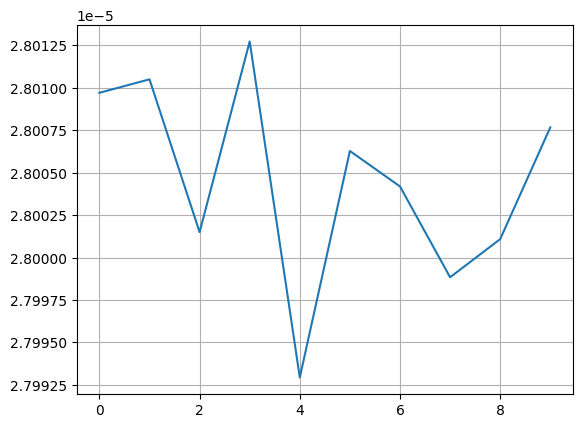

In [165]:
plt.plot(model_log.history['loss'])
plt.grid(True)
plt.show()

In [166]:
model_classification_2.predict(X_cl_test, verbose=None)[:5]

array([[0.5072586 , 0.4927414 ],
       [0.49895552, 0.5010446 ],
       [0.4935064 , 0.50649357],
       [0.512115  , 0.48788494],
       [0.54395956, 0.4560404 ]], dtype=float32)

In [167]:
y_cl_pred = np.argmax(model_classification_2.predict(X_cl_test, verbose=None), axis=1)
print(classification_report(y_cl_test, y_cl_pred))
print(confusion_matrix(y_cl_test, y_cl_pred))

              precision    recall  f1-score   support

           0       0.34      0.78      0.47      3468
           1       0.81      0.38      0.52      8653

    accuracy                           0.50     12121
   macro avg       0.58      0.58      0.49     12121
weighted avg       0.68      0.50      0.50     12121

[[2718  750]
 [5365 3288]]


In [171]:
model_classification = keras.Sequential(
    [
        Dense(64, activation="relu", input_shape=(12,)),
        Dense(128, activation="relu"),
        Dropout(0.05),
        Dense(64, activation="relu"),
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        # сначала используем 1 нейрон и sigmoid
        Dense(1, activation="sigmoid"),
    ]
)
# в качестве функции активации используется бинарная  кроссэнтропия
model_classification.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
# verbose=None - не будет логов
model_log = model_classification.fit(X_cl_train, y_cl_train, epochs=25)

Epoch 1/25
1515/1515 [==============================] - 2s 1ms/step - loss: 0.0230
Epoch 2/25
1515/1515 [==============================] - 2s 1ms/step - loss: 0.0104
Epoch 3/25
1515/1515 [==============================] - 2s 1ms/step - loss: 0.0083
Epoch 4/25
1515/1515 [==============================] - 1s 988us/step - loss: 0.0059
Epoch 5/25
1515/1515 [==============================] - 2s 1ms/step - loss: 0.0052
Epoch 6/25
1515/1515 [==============================] - 2s 1ms/step - loss: 0.0042
Epoch 7/25
1515/1515 [==============================] - 1s 984us/step - loss: 0.0040
Epoch 8/25
1515/1515 [==============================] - 2s 1ms/step - loss: 0.0034
Epoch 9/25
1515/1515 [==============================] - 2s 1ms/step - loss: 0.0036
Epoch 10/25
1515/1515 [==============================] - 1s 974us/step - loss: 0.0030
Epoch 11/25
1515/1515 [==============================] - 1s 986us/step - loss: 0.0033
Epoch 12/25
1515/1515 [==============================] - 2s 997us/step - loss

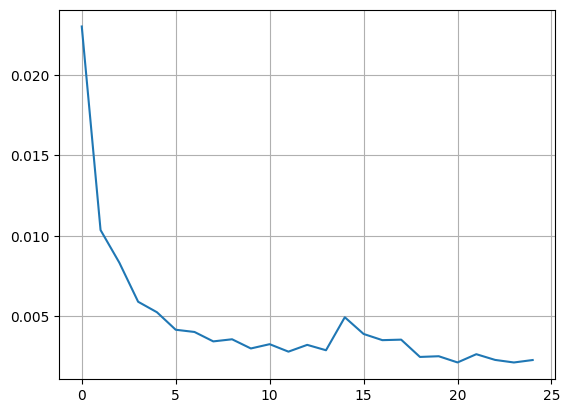

In [172]:
plt.plot(model_log.history['loss'])
plt.grid(True)
plt.show()

In [173]:
y_cl_pred = np.around(model_classification.predict(X_cl_test, verbose=None))
print(classification_report(y_cl_test, y_cl_pred))
print(confusion_matrix(y_cl_test, y_cl_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3468
           1       1.00      1.00      1.00      8653

    accuracy                           1.00     12121
   macro avg       1.00      1.00      1.00     12121
weighted avg       1.00      1.00      1.00     12121

[[3446   22]
 [   0 8653]]


## Регрессия

In [176]:
df = pd.read_csv("C:/Users/seito/Jupyter Notebook/data/dataset3_EDA+.csv")
df.head()

,Price,Area,Latitude,Longitude,Bedrooms,Bathrooms,Balcony,Neworold,Parking,Furnished_Status,Lift,Type_Of_Building
0,2240.0,629.0,19.032800,72.896357,2,2,0,1,0,0,0,0
1,3500.0,974.0,19.032800,72.896357,3,2,0,1,0,0,0,0
2,3170.0,968.0,19.085600,72.909277,3,3,0,1,0,0,0,0
3,1870.0,629.0,19.155756,72.846862,2,2,2,1,1,0,1,0
4,1350.0,1090.0,19.177555,72.849887,2,2,0,1,0,0,0,0


In [177]:
y_reg = df['Price'].values.reshape(-1, 1)
X_reg = df.drop(['Price'], axis=1)

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=0)
X_reg_train.shape, y_reg_train.shape, X_reg_test.shape, y_reg_test.shape

((4216, 11), (4216, 1), (1055, 11), (1055, 1))

In [236]:
model_regression = keras.Sequential(
    [
        Dense(64, activation="relu", input_shape=(11,)),
        Dense(32, activation="linear"),Dropout(0.1),
        Dense(16, activation="relu"),
        Dropout(0.1),
        Dense(1, activation="linear"),
    ]
)
model_regression.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 64)                768       
                                                                 
 dense_97 (Dense)            (None, 32)                2080      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_98 (Dense)            (None, 16)                528       
                                                                 
 dropout_20 (Dropout)        (None, 16)                0         
                                                                 
 dense_99 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 

In [240]:
model_regression.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss="mse")
model_log = model_regression.fit(X_reg_train, y_reg_train, epochs=56)

Epoch 1/56
132/132 [==============================] - 1s 1ms/step - loss: 756983.5625
Epoch 2/56
132/132 [==============================] - 0s 2ms/step - loss: 755893.6875
Epoch 3/56
132/132 [==============================] - 0s 1ms/step - loss: 764190.5625
Epoch 4/56
132/132 [==============================] - 0s 2ms/step - loss: 746889.5625
Epoch 5/56
132/132 [==============================] - 0s 1ms/step - loss: 747037.3750
Epoch 6/56
132/132 [==============================] - 0s 1ms/step - loss: 752086.1875
Epoch 7/56
132/132 [==============================] - 0s 1ms/step - loss: 744536.3125
Epoch 8/56
132/132 [==============================] - 0s 1ms/step - loss: 765484.1250
Epoch 9/56
132/132 [==============================] - 0s 1ms/step - loss: 751718.1250
Epoch 10/56
132/132 [==============================] - 0s 2ms/step - loss: 739321.1250
Epoch 11/56
132/132 [==============================] - 0s 1ms/step - loss: 756512.1250
Epoch 12/56
132/132 [==============================]

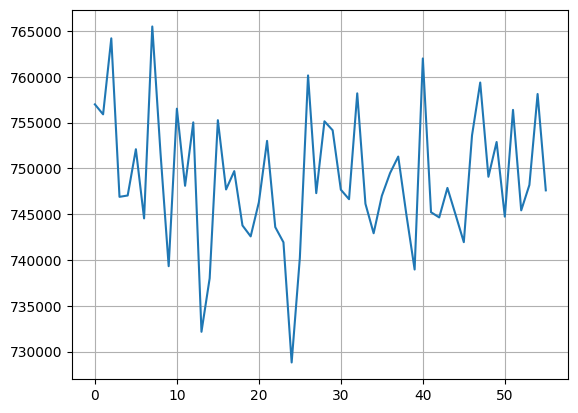

In [241]:
plt.plot(model_log.history['loss'])
plt.grid(True)
plt.show()

In [242]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_reg_pred = model_regression.predict(X_reg_test, verbose=None)

print('MSE:', mean_squared_error(y_reg_test, y_reg_pred))
print('MAE:', mean_absolute_error(y_reg_test, y_reg_pred))
print('R^2:', r2_score(y_reg_test, y_reg_pred))

MSE: 636054.8446707228
MAE: 618.9725753711863
R^2: 0.2695839858249699


## Многослойный персептрон (Multilayer perceptron)

### Классификация 👍

In [2]:
%run -m MLP3

In [3]:
from sklearn.datasets import load_iris 
iris_dataset = load_iris()

iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Итого имеем 3 класса:
- `setosa` - щетинистый
- `versicolor` - разноцветный
- `virginica` - виргинский

In [5]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_dataframe = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, 
                                                    iris_dataset['target'],
                                                    random_state=0) # random_state - для воспроизводимости
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}') # test_size = 0.25

X_train shape: (112, 4), y_train shape: (112, 1),
X_test shape: (38, 4), y_test shape: (38, 1)


In [8]:
from MLP3 import MLP, Layer
from optimizers import AdamOptimizer, SGD

layers = [Layer(5, 'Relu'),
          Layer(6, 'Relu'),
          Layer(3, 'softmax')]

mlp = MLP(input_dim=4, 
          hidden_layers=layers, 
          loss='SparseCrossEntropy',
          optimizer=SGD(learning_rate=0.0002))

In [9]:
mlp.fit(X_train, y_train, batch_size=50, num_epochs=400)

Epoch 1/400 - loss: 1.3631
Epoch 2/400 - loss: 1.2590
Epoch 3/400 - loss: 1.2843
Epoch 4/400 - loss: 1.2639
Epoch 5/400 - loss: 1.2706
Epoch 6/400 - loss: 1.2590
Epoch 7/400 - loss: 1.2363
Epoch 8/400 - loss: 1.2772
Epoch 9/400 - loss: 1.2003
Epoch 10/400 - loss: 1.1883
Epoch 11/400 - loss: 1.1900
Epoch 12/400 - loss: 1.2175
Epoch 13/400 - loss: 1.2054
Epoch 14/400 - loss: 1.1710
Epoch 15/400 - loss: 1.1730
Epoch 16/400 - loss: 1.1652
Epoch 17/400 - loss: 1.1593
Epoch 18/400 - loss: 1.1254
Epoch 19/400 - loss: 1.0995
Epoch 20/400 - loss: 1.1258
Epoch 21/400 - loss: 1.1288
Epoch 22/400 - loss: 1.1253
Epoch 23/400 - loss: 1.1008
Epoch 24/400 - loss: 1.1009
Epoch 25/400 - loss: 1.0628
Epoch 26/400 - loss: 1.1063
Epoch 27/400 - loss: 1.0873
Epoch 28/400 - loss: 1.0888
Epoch 29/400 - loss: 1.0717
Epoch 30/400 - loss: 1.0621
Epoch 31/400 - loss: 1.0759
Epoch 32/400 - loss: 1.0667
Epoch 33/400 - loss: 1.0721
Epoch 34/400 - loss: 1.0725
Epoch 35/400 - loss: 1.0429
Epoch 36/400 - loss: 1.0619
E

In [18]:
y_pred = np.argmax(mlp.predict(X_test), axis=1)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2], dtype=int64)

In [21]:
print('Точность: ', accuracy_score(y_test, y_pred))
print('Матрица ошибок: \n', confusion_matrix(y_test, y_pred))

Точность:  0.9473684210526315
Матрица ошибок: 
 [[13  0  0]
 [ 0 14  2]
 [ 0  0  9]]


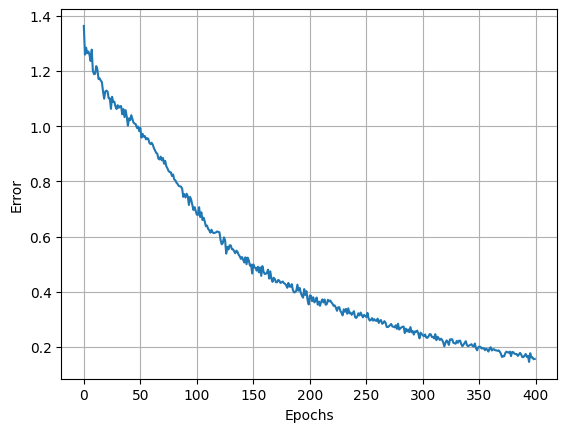

In [11]:
mlp.error_plot()

### Регрессия 💩

In [264]:
from sklearn.datasets import make_regression


X, y = make_regression(n_samples=100, n_features=5, noise=20, random_state=42)
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5), (80, 1), (20, 5), (20, 1))

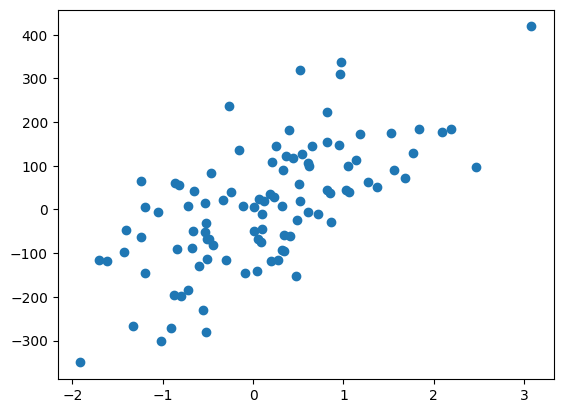

In [265]:
plt.scatter(X[:, 1], y)

In [278]:
model = keras.Sequential(
    [
        Dense(64, activation="relu", input_shape=(5,)),
        Dense(32, activation="linear"),
        Dense(16, activation="relu"),
        Dense(1, activation="linear")
    ]
)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
model_log = model.fit(X_train, y_train, epochs=50, batch_size=5)

Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 18379.6309
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 12357.3213
Epoch 3/50
16/16 [==============================] - 0s 1ms/step - loss: 3263.0176
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 1003.4261
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 796.1500
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 674.4193
Epoch 7/50
16/16 [==============================] - 0s 1ms/step - loss: 609.0516
Epoch 8/50
16/16 [==============================] - 0s 1ms/step - loss: 525.5071
Epoch 9/50
16/16 [==============================] - 0s 1ms/step - loss: 562.8699
Epoch 10/50
16/16 [==============================] - 0s 1ms/step - loss: 587.4362
Epoch 11/50
16/16 [==============================] - 0s 1ms/step - loss: 491.3581
Epoch 12/50
16/16 [==============================] - 0s 1ms/step - loss: 392.5173
Epoch 13/50
16/16 [

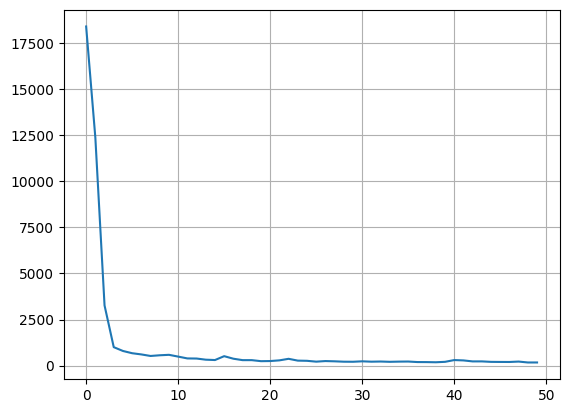

In [279]:
plt.plot(model_log.history['loss'])
plt.grid(True)
plt.show()

In [280]:
y_pred = model.predict(X_test, verbose=None)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

MSE: 600.2630039138417
MAE: 21.177251262970735
R^2: 0.9665338502573863


In [327]:
layers_reg = [
    Layer(64, 'Relu'),
    Layer(32, 'linear'),
    Layer(16, 'Relu'),
    Layer(1, 'linear')
    ]

mlp_reg = MLP(input_dim=5, 
          hidden_layers=layers_reg, 
          loss='MSE',
          optimizer=AdamOptimizer(-0.001))

In [328]:
mlp_reg.fit(X_train, y_train, batch_size=5, num_epochs=50)

Epoch 1/50 - loss: 10887.9751
Epoch 2/50 - loss: 4505.4811
Epoch 3/50 - loss: 4446.2289
Epoch 4/50 - loss: 8187.7511
Epoch 5/50 - loss: 4158.5449
Epoch 6/50 - loss: 5049.6257
Epoch 7/50 - loss: 3175.4441
Epoch 8/50 - loss: 3416.3658
Epoch 9/50 - loss: 4628.5731
Epoch 10/50 - loss: 4849.6517
Epoch 11/50 - loss: 4779.5577
Epoch 12/50 - loss: 5655.4731
Epoch 13/50 - loss: 4142.7580
Epoch 14/50 - loss: 3380.4030
Epoch 15/50 - loss: 4648.2603
Epoch 16/50 - loss: 3805.4774
Epoch 17/50 - loss: 3038.9228
Epoch 18/50 - loss: 2821.3453
Epoch 19/50 - loss: 2604.0646
Epoch 20/50 - loss: 2523.6003
Epoch 21/50 - loss: 2683.4668
Epoch 22/50 - loss: 4629.1952
Epoch 23/50 - loss: 2461.3728
Epoch 24/50 - loss: 2002.8053
Epoch 25/50 - loss: 2707.3283
Epoch 26/50 - loss: 2102.9426
Epoch 27/50 - loss: 1584.5186
Epoch 28/50 - loss: 3547.8472
Epoch 29/50 - loss: 2111.4882
Epoch 30/50 - loss: 2612.5920
Epoch 31/50 - loss: 2780.8001
Epoch 32/50 - loss: 2528.6461
Epoch 33/50 - loss: 3338.4026
Epoch 34/50 - loss

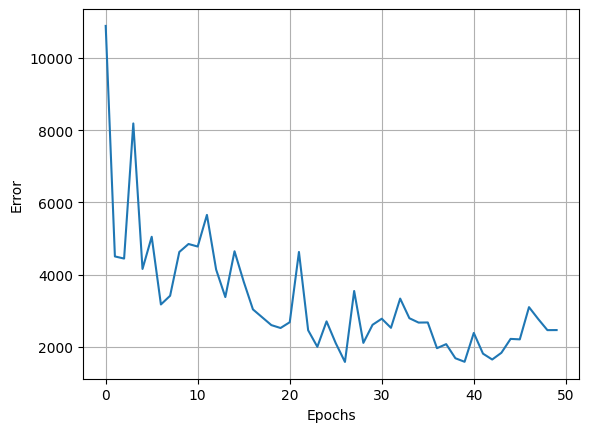

In [329]:
mlp_reg.error_plot()

In [331]:
y_pred = mlp_reg.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

MSE: 2333.1763333639537
MAE: 38.71295980190369
R^2: 0.8699196384931829


Второй пример. Преобразование Цельсия в Фаренгейта (°C в °F)


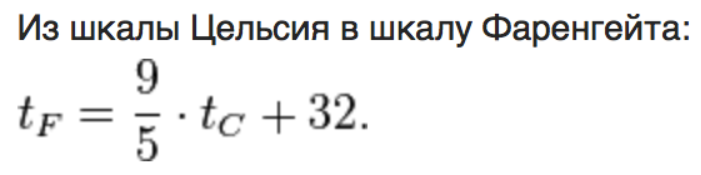

In [348]:
from optimizers import RMSPropOptimizer

c = np.array([-40, -10, 0, 8, 15, 22, 38]).reshape(-1, 1)
f = np.array([-40, -10, 32, 46, 59, 72, 100]).reshape(-1, 1)

layers_reg = [Layer(1, 'linear')]

mlp_reg = MLP(input_dim=1, 
          hidden_layers=layers_reg, 
          loss='MSE',
          optimizer=RMSPropOptimizer(-0.01))

In [349]:
mlp_reg.fit(c, f, batch_size=1, num_epochs=500)

Epoch 1/500 - loss: 1577.7683
Epoch 2/500 - loss: 1337.2807
Epoch 3/500 - loss: 1194.9754
Epoch 4/500 - loss: 1104.3780
Epoch 5/500 - loss: 1006.8983
Epoch 6/500 - loss: 938.9643
Epoch 7/500 - loss: 896.6220
Epoch 8/500 - loss: 823.1803
Epoch 9/500 - loss: 765.0650
Epoch 10/500 - loss: 741.1697
Epoch 11/500 - loss: 676.2505
Epoch 12/500 - loss: 666.4537
Epoch 13/500 - loss: 641.7315
Epoch 14/500 - loss: 613.4347
Epoch 15/500 - loss: 593.8385
Epoch 16/500 - loss: 582.8398
Epoch 17/500 - loss: 563.1275
Epoch 18/500 - loss: 540.1423
Epoch 19/500 - loss: 544.6345
Epoch 20/500 - loss: 581.6948
Epoch 21/500 - loss: 563.7160
Epoch 22/500 - loss: 611.2309
Epoch 23/500 - loss: 612.5215
Epoch 24/500 - loss: 588.6365
Epoch 25/500 - loss: 586.7617
Epoch 26/500 - loss: 559.8143
Epoch 27/500 - loss: 618.5180
Epoch 28/500 - loss: 613.4924
Epoch 29/500 - loss: 577.8472
Epoch 30/500 - loss: 605.0865
Epoch 31/500 - loss: 598.6242
Epoch 32/500 - loss: 543.2081
Epoch 33/500 - loss: 572.5235
Epoch 34/500 -

In [350]:
mlp_reg.get_weights()

[array([[2.00854302]])] [array([[28.59050747]])]


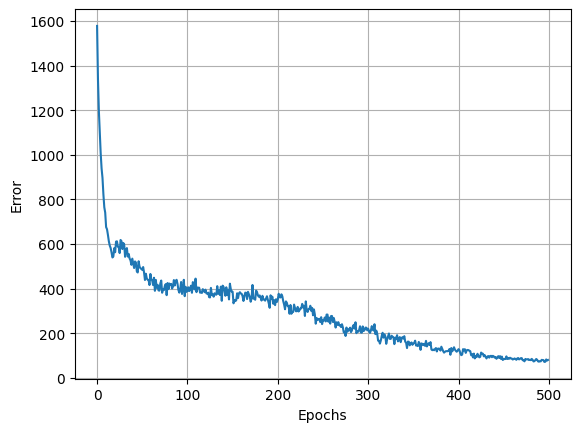

In [351]:
mlp_reg.error_plot()

Если скорость обучение положительное число: 

In [352]:
mlp_reg = MLP(input_dim=1, 
          hidden_layers=layers_reg, 
          loss='MSE',
          optimizer=RMSPropOptimizer(0.01))

mlp_reg.fit(c, f, batch_size=1, num_epochs=500)

Epoch 1/500 - loss: 2007.0858
Epoch 2/500 - loss: 2436.1010
Epoch 3/500 - loss: 2776.0626
Epoch 4/500 - loss: 3277.7722
Epoch 5/500 - loss: 3763.9349
Epoch 6/500 - loss: 4078.5768
Epoch 7/500 - loss: 4776.9454
Epoch 8/500 - loss: 5312.4859
Epoch 9/500 - loss: 5949.0555
Epoch 10/500 - loss: 6511.2121
Epoch 11/500 - loss: 7438.7105
Epoch 12/500 - loss: 8060.8320
Epoch 13/500 - loss: 8955.4154
Epoch 14/500 - loss: 9789.5633
Epoch 15/500 - loss: 10543.0106
Epoch 16/500 - loss: 11685.4630
Epoch 17/500 - loss: 12435.7257
Epoch 18/500 - loss: 13351.1948
Epoch 19/500 - loss: 14426.3164
Epoch 20/500 - loss: 15519.3959
Epoch 21/500 - loss: 16793.5617
Epoch 22/500 - loss: 18071.5059
Epoch 23/500 - loss: 19130.4703
Epoch 24/500 - loss: 20180.5608
Epoch 25/500 - loss: 21599.2667
Epoch 26/500 - loss: 22860.8179
Epoch 27/500 - loss: 24076.1691
Epoch 28/500 - loss: 25534.6856
Epoch 29/500 - loss: 26903.1912
Epoch 30/500 - loss: 28647.9558
Epoch 31/500 - loss: 30177.1182
Epoch 32/500 - loss: 31633.0209

In [353]:
mlp_reg.get_weights()

[array([[-94.15115236]])] [array([[-47.36206813]])]


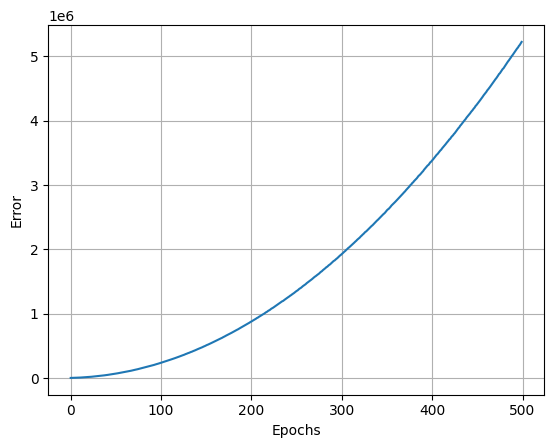

In [354]:
mlp_reg.error_plot()